In [4]:
from google.colab import files
uploaded = files.upload()

Saving 01_District_wise_crimes_committed_IPC_2001_2012.csv to 01_District_wise_crimes_committed_IPC_2001_2012.csv


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor


In [9]:
df = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [10]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [16]:
print(df.tail)

<bound method NDFrame.tail of             STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001     101                 60   
1     ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2     ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3     ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4     ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   
...              ...            ...   ...     ...                ...   
9012     LAKSHADWEEP    LAKSHADWEEP  2012       0                  0   
9013     LAKSHADWEEP          TOTAL  2012       0                  0   
9014      PUDUCHERRY       KARAIKAL  2012       5                  6   
9015      PUDUCHERRY     PUDUCHERRY  2012      24                 21   
9016      PUDUCHERRY          TOTAL  2012      29                 27   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                               

In [12]:
print(df.columns)

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')


In [14]:
# prompt: print colums with unique status

for col in df.columns:
    print(f"{col}: Unique values = {df[col].nunique()}")


STATE/UT: Unique values = 35
DISTRICT: Unique values = 808
YEAR: Unique values = 12
MURDER: Unique values = 477
ATTEMPT TO MURDER: Unique values = 514
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER: Unique values = 171
RAPE: Unique values = 420
CUSTODIAL RAPE: Unique values = 5
OTHER RAPE: Unique values = 419
KIDNAPPING & ABDUCTION: Unique values = 534
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS: Unique values = 460
KIDNAPPING AND ABDUCTION OF OTHERS: Unique values = 307
DACOITY: Unique values = 227
PREPARATION AND ASSEMBLY FOR DACOITY: Unique values = 191
ROBBERY: Unique values = 455
BURGLARY: Unique values = 922
THEFT: Unique values = 1751
AUTO THEFT: Unique values = 1114
OTHER THEFT: Unique values = 1343
RIOTS: Unique values = 804
CRIMINAL BREACH OF TRUST: Unique values = 411
CHEATING: Unique values = 824
COUNTERFIETING: Unique values = 167
ARSON: Unique values = 295
HURT/GREVIOUS HURT: Unique values = 1855
DOWRY DEATHS: Unique values = 256
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MOD

In [17]:
print(df["STATE/UT"].unique())

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI UT' 'LAKSHADWEEP'
 'PUDUCHERRY']


In [19]:
# prompt: count the number of repeation in the state/ut column

print(df['STATE/UT'].value_counts())



STATE/UT
UTTAR PRADESH        878
MADHYA PRADESH       628
MAHARASHTRA          552
BIHAR                540
TAMIL NADU           469
RAJASTHAN            454
ODISHA               430
KARNATAKA            399
GUJARAT              384
ANDHRA PRADESH       370
ASSAM                362
JAMMU & KASHMIR      322
PUNJAB               314
JHARKHAND            312
WEST BENGAL          309
HARYANA              268
CHHATTISGARH         266
KERALA               233
ARUNACHAL PRADESH    195
DELHI UT             183
HIMACHAL PRADESH     176
UTTARAKHAND          168
NAGALAND             138
MANIPUR              125
MIZORAM              108
MEGHALAYA             96
TRIPURA               67
SIKKIM                60
GOA                   36
DAMAN & DIU           36
A & N ISLANDS         36
PUDUCHERRY            31
CHANDIGARH            24
D & N HAVELI          24
LAKSHADWEEP           24
Name: count, dtype: int64


In [24]:
print("Missing values before cleaning:")
print(df.isnull().sum())
df.dropna( inplace=True)
print("MIssing values after cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0

In [25]:
df.rename( columns={
    'STATE/UT': 'State',
    'YEAR': 'Year',
    'DISTRICT': 'District',
    'TOTAL IPC CRIMES': 'Crime_count',
}, inplace= True)

In [27]:
print(df.columns)

Index(['State', 'District', 'Year', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'Crime_count'],
      dtype='object')


In [32]:
df["State"] =df["State"].str.strip()   #.strip() method removes any leading or trailing whitespace characters (like spaces, tabs, or newlines) from the strings in the column.


<ipython-input-32-bc7ae7f48fe5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["State"] =df["State"].str.strip()   #.strip() method removes any leading or trailing whitespace characters (like spaces, tabs, or newlines) from the strings in the column.


In [34]:
df.drop_duplicates(inplace=True)
df.isnull().sum()

,0
State,0
Year,0
Crime_count,0


In [33]:
df= df[["State",'Year','Crime_count']]
df

,State,Year,Crime_count
0,ANDHRA PRADESH,2001,4154
1,ANDHRA PRADESH,2001,4125
2,ANDHRA PRADESH,2001,5818
3,ANDHRA PRADESH,2001,3140
4,ANDHRA PRADESH,2001,6507
...,...,...,...
9011,DELHI UT,2012,5558
9012,LAKSHADWEEP,2012,60
9014,PUDUCHERRY,2012,787
9015,PUDUCHERRY,2012,3494


from matplotlib import pyplot as plt
df['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Crime_count'].plot(kind='hist', bins=20, title='Crime_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Year', y='Crime_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Crime_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Crime_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Crime_count'].plot(kind='line', figsize=(8, 4), title='Crime_count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [37]:
state_year_crime = df.groupby(['State', 'Year'])['Crime_count'].sum()
state_year_crime

State          Year
A & N ISLANDS  2001      1316
               2002      1216
               2003      1288
               2004      1496
               2005      1364
                        ...  
WEST BENGAL    2008    210838
               2009    226072
               2010    259232
               2011    286394
               2012    322854
Name: Crime_count, Length: 420, dtype: int64

In [35]:
df.tail(100)

,State,Year,Crime_count
8913,UTTAR PRADESH,2012,2400
8914,UTTAR PRADESH,2012,4438
8915,UTTAR PRADESH,2012,1535
8916,UTTAR PRADESH,2012,7984
8917,UTTAR PRADESH,2012,775
...,...,...,...
9011,DELHI UT,2012,5558
9012,LAKSHADWEEP,2012,60
9014,PUDUCHERRY,2012,787
9015,PUDUCHERRY,2012,3494


from matplotlib import pyplot as plt
_df_0['Crime_count'].plot(kind='hist', bins=20, title='Crime_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Crime_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Crime_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['Crime_count'].plot(kind='line', figsize=(8, 4), title='Crime_count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [40]:
state_total_crime = df.groupby('State')['Crime_count'].sum().reset_index()
state_total_crime

,State,Crime_count
0,A & N ISLANDS,17397
1,ANDHRA PRADESH,4032784
2,ARUNACHAL PRADESH,55062
3,ASSAM,1193033
4,BIHAR,2691032
5,CHANDIGARH,40807
6,CHHATTISGARH,1120642
7,D & N HAVELI,4651
8,DAMAN & DIU,5896
9,DELHI UT,1266348


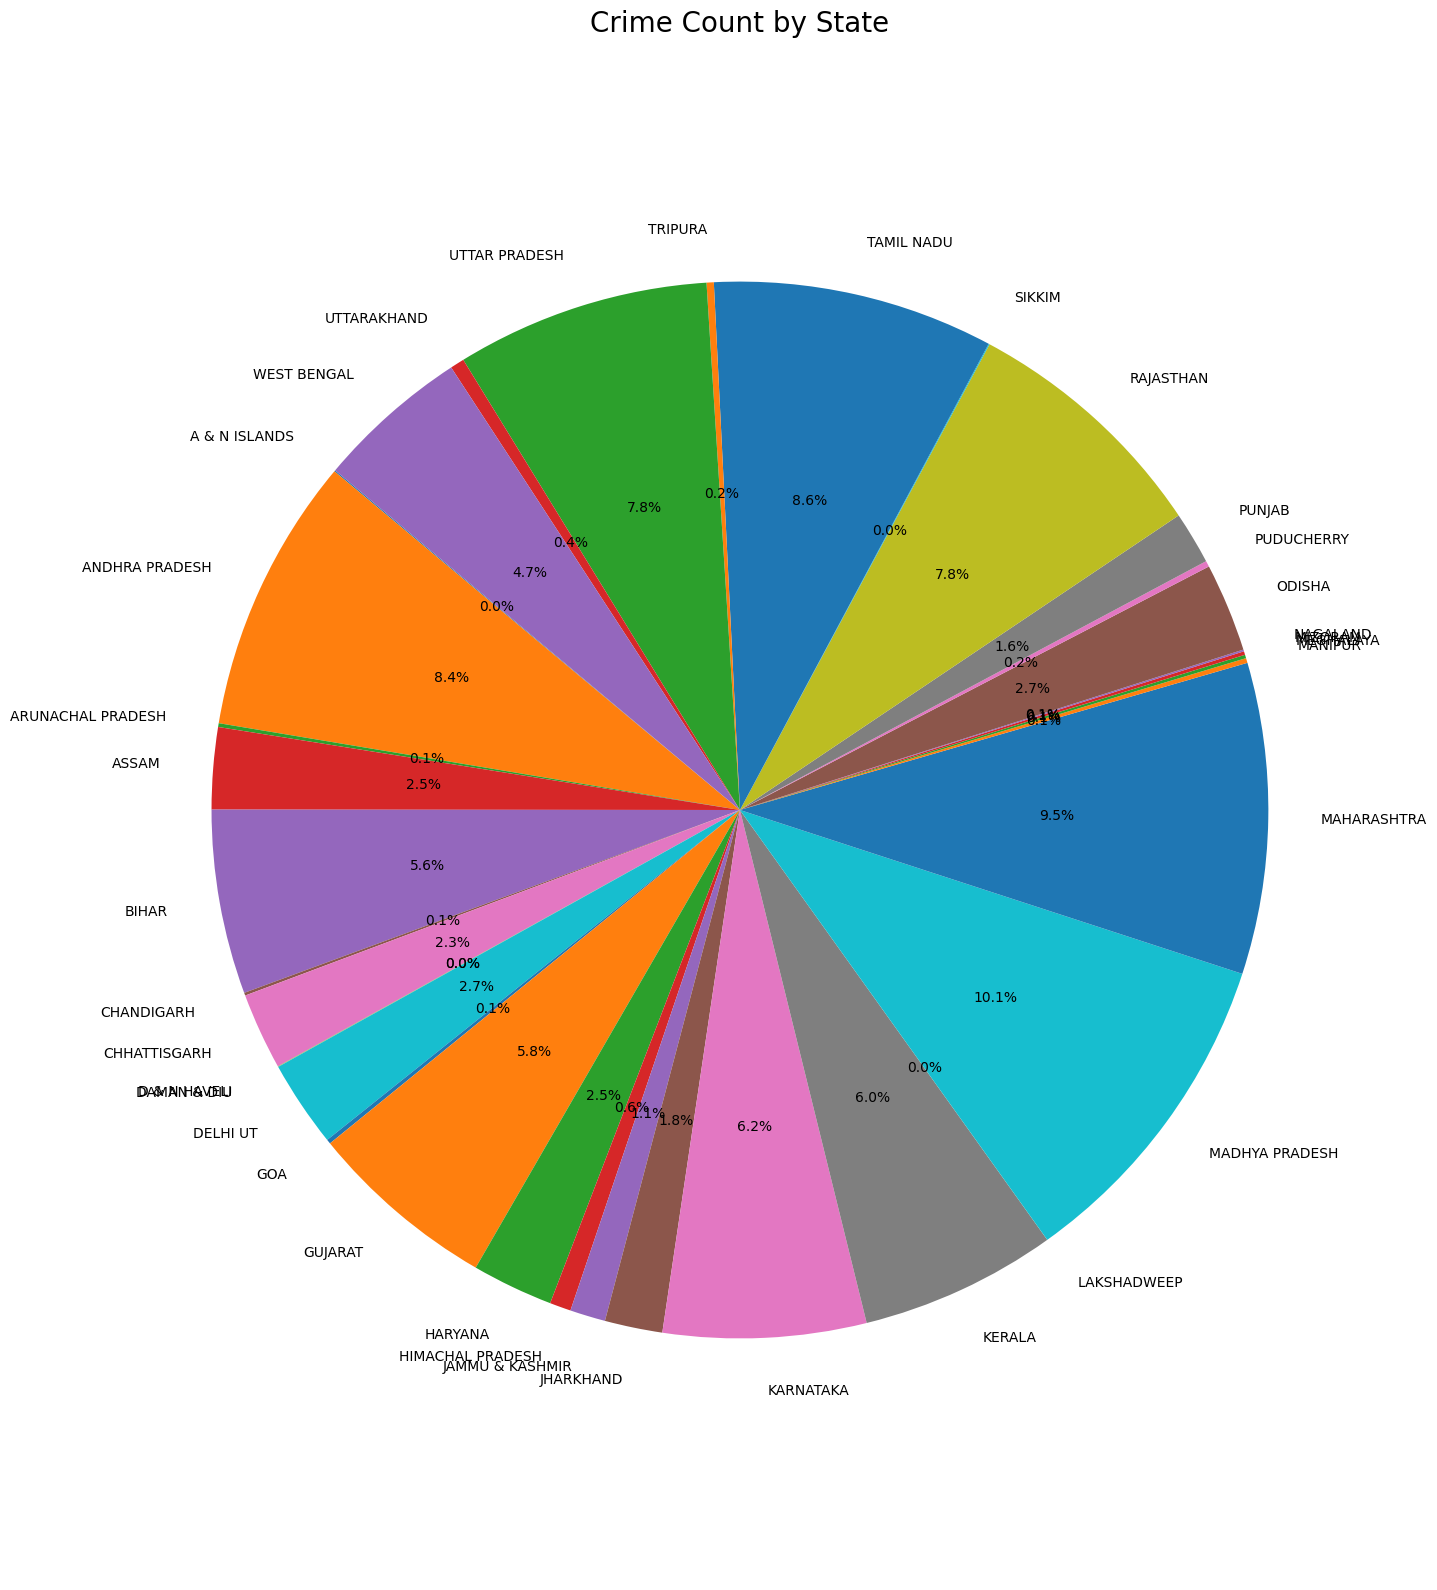

In [50]:
#pie chart
plt.figure(figsize=(15,20))
plt.pie(state_total_crime['Crime_count'], labels=state_total_crime['State'], autopct='%1.1f%%', startangle=140)
plt.title('Crime Count by State' , fontsize=20)
plt.axis('equal')
plt.show()